<h2><b>Input : </b></h2>

*   GSE4115_data_set.csv

<h2><b>Output : </b></h2>

*   train_microarray.csv
*   test_microarray.csv
*   suspect.csv

# Run All

## Persiapan

### Import dan Load Data

Library yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

Mengatur Style

In [ ]:
rcParams['figure.figsize'] = 15, 10
mpl.style.use(['ggplot'])

Load Data

In [ ]:
df_microarray = pd.read_csv('https://drive.google.com/uc?id=1WpcrVuUzdKTePPfC_YP_YswqalazPUZ_')

Melihat isi Data

In [ ]:
df_microarray.head()

,Unnamed: 0,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Type
0,GSM93997,2.442288,2.470924,2.562846,2.505484,2.233418,2.906437,2.670240,2.274189,2.859309,...,2.174480,1.781939,1.624393,1.760536,2.587033,2.724262,1.735709,1.894571,3.108580,Smoker NOT diagnosed with cancer Sample 283
1,GSM94019,2.385594,2.581100,2.754756,2.727595,2.554836,3.142615,2.913769,2.271800,2.846867,...,1.834306,1.785170,1.637251,1.550614,2.374564,2.811888,1.863153,2.001221,2.901146,Smoker diagnosed with cancer Sample 57
2,GSM94020,2.383285,2.596276,2.705605,2.760980,2.557625,2.992440,2.949728,2.377481,2.766354,...,1.832593,1.912807,1.833902,1.645175,2.085942,2.779131,1.925734,2.030875,3.002046,Smoker diagnosed with cancer Sample 62
3,GSM94021,2.494831,2.664084,2.682104,2.682649,2.491295,3.053541,2.879382,2.354667,2.861317,...,1.922517,1.831512,1.624369,1.696695,2.499300,2.780663,1.803978,1.952011,3.031046,Smoker diagnosed with cancer Sample 130
4,GSM94022,2.455600,2.608663,2.648509,2.620558,2.443954,2.990393,2.802894,2.226639,2.715012,...,1.892691,1.924166,1.660460,1.569085,2.336419,2.823302,1.946581,1.924745,2.942538,Smoker diagnosed with cancer Sample 142


In [ ]:
df_microarray.shape

(192, 22217)

### Pisah Suspect

Ada 5 Suspect (Tidak ada hasil identifikasi) yang akan dipisah dari dataset utama

In [ ]:
df_microarray.iloc[187:192]

,Unnamed: 0,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Type
187,GSM98871,2.256059,2.468628,2.700065,2.770134,2.559232,2.904486,2.924660,2.287277,2.783982,...,1.614297,1.850382,1.708823,1.933460,2.265404,2.735398,1.886623,2.187185,2.825019,Smoker with suspect lung cancer Sample 294
188,GSM98872,2.476502,2.596324,2.681206,2.564952,2.484916,2.435804,2.751464,2.257669,2.607381,...,1.662349,1.878626,1.761549,1.634541,2.285498,2.718018,2.259039,2.164819,2.729377,Smoker with suspect lung cancer Sample 251
189,GSM98873,2.516803,2.551656,2.800885,2.872871,2.352785,2.557198,2.925518,2.234509,2.619574,...,1.768395,1.908270,1.772988,1.712671,2.330806,2.696405,1.929260,2.256938,2.833373,Smoker with suspect lung cancer Sample 180
190,GSM98874,2.499117,2.582582,2.719174,2.813643,2.559049,2.656475,2.763619,2.297253,2.695902,...,1.690175,2.009129,1.662128,1.694779,2.288564,2.739348,1.986285,2.049009,2.892169,Smoker with suspect lung cancer Sample 179
191,GSM98875,2.411571,2.579096,2.659214,2.756731,2.453675,2.912560,2.780565,2.437816,2.840149,...,1.725878,1.906555,1.729066,1.756178,2.301117,2.773462,1.914869,2.079537,2.970961,Smoker with suspect lung cancer Sample 295


Ukuran Dataset setelah pemisahan dengan Suspect

In [ ]:
suspect = df_microarray.iloc[187:192]
df_microarray.drop([187,188,189,190,191], axis=0, inplace=True)
df_microarray.shape

(187, 22217)

### Pelabelan

Membuat kolom baru "Label" dengan 1 = Kanker, dan 0=Tidak Kanker

In [ ]:
tipe = df_microarray['Type']
tipe

0      Smoker NOT diagnosed with cancer Sample 283
1           Smoker diagnosed with cancer Sample 57
2           Smoker diagnosed with cancer Sample 62
3          Smoker diagnosed with cancer Sample 130
4          Smoker diagnosed with cancer Sample 142
                          ...                     
182    Smoker NOT diagnosed with cancer Sample 326
183    Smoker NOT diagnosed with cancer Sample 316
184    Smoker NOT diagnosed with cancer Sample 265
185    Smoker NOT diagnosed with cancer Sample 296
186    Smoker NOT diagnosed with cancer Sample 317
Name: Type, Length: 187, dtype: object

Jika tidak ditemukan kata 'NOT', maka kanker

In [ ]:
label = []

for i in range(0,len(tipe)):
  if tipe[i].find('NOT') == -1:
    label.append(1)
  else:
    label.append(0)

label

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Melihat Dataset setelah ditambahkan kolom Label

In [ ]:
df_microarray['Label'] = label
df_microarray.head()

,Unnamed: 0,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,...,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Type,Label
0,GSM93997,2.442288,2.470924,2.562846,2.505484,2.233418,2.906437,2.670240,2.274189,2.859309,...,1.781939,1.624393,1.760536,2.587033,2.724262,1.735709,1.894571,3.108580,Smoker NOT diagnosed with cancer Sample 283,0
1,GSM94019,2.385594,2.581100,2.754756,2.727595,2.554836,3.142615,2.913769,2.271800,2.846867,...,1.785170,1.637251,1.550614,2.374564,2.811888,1.863153,2.001221,2.901146,Smoker diagnosed with cancer Sample 57,1
2,GSM94020,2.383285,2.596276,2.705605,2.760980,2.557625,2.992440,2.949728,2.377481,2.766354,...,1.912807,1.833902,1.645175,2.085942,2.779131,1.925734,2.030875,3.002046,Smoker diagnosed with cancer Sample 62,1
3,GSM94021,2.494831,2.664084,2.682104,2.682649,2.491295,3.053541,2.879382,2.354667,2.861317,...,1.831512,1.624369,1.696695,2.499300,2.780663,1.803978,1.952011,3.031046,Smoker diagnosed with cancer Sample 130,1
4,GSM94022,2.455600,2.608663,2.648509,2.620558,2.443954,2.990393,2.802894,2.226639,2.715012,...,1.924166,1.660460,1.569085,2.336419,2.823302,1.946581,1.924745,2.942538,Smoker diagnosed with cancer Sample 142,1


## Data Exploration Awal

In [ ]:
df_microarray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Columns: 22218 entries, Unnamed: 0 to Label
dtypes: float64(22215), int64(1), object(2)
memory usage: 31.7+ MB


In [ ]:
statistik = df_microarray.describe()
statistik

,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,213326_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Label
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,2.421983,2.566039,2.624894,2.610490,2.317709,2.911963,2.668906,2.281622,2.784388,2.502677,...,1.941959,1.882329,1.663191,1.663133,2.391531,2.782927,1.842941,2.004227,2.954205,0.518717
std,0.114052,0.087571,0.099617,0.124720,0.217466,0.148909,0.241717,0.070354,0.089306,0.070281,...,0.126681,0.091236,0.078887,0.111108,0.112774,0.041579,0.086666,0.089581,0.090213,0.500991
min,2.119960,2.372278,2.423041,2.340690,1.907884,2.453795,2.111674,2.120483,2.529505,2.306069,...,1.524620,1.707944,1.518307,1.481120,1.948063,2.610190,1.664655,1.777233,2.412201,0.000000
25%,2.343159,2.502229,2.558243,2.504723,2.134055,2.815441,2.491598,2.232108,2.726190,2.457169,...,1.869327,1.827858,1.617232,1.585316,2.323446,2.754945,1.789154,1.945131,2.916792,0.000000
50%,2.427280,2.560807,2.605918,2.603218,2.288783,2.910737,2.665103,2.271800,2.779851,2.498776,...,1.955607,1.873069,1.649829,1.644555,2.402213,2.783586,1.826932,1.994645,2.962583,1.000000
75%,2.502845,2.628356,2.702419,2.718844,2.492089,3.011093,2.843292,2.321846,2.832650,2.548891,...,2.017265,1.924704,1.688793,1.712976,2.479442,2.810410,1.875255,2.046956,3.001873,1.000000
max,2.738313,2.788305,2.884252,2.886615,2.794872,3.238676,3.190973,2.502239,3.144257,2.676495,...,2.379134,2.464704,2.238768,2.124757,2.622505,2.870015,2.270190,2.319459,3.119440,1.000000


In [ ]:
statistik.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Columns: 22216 entries, 211612_s_at to Label
dtypes: float64(22216)
memory usage: 1.4+ MB


In [ ]:
statistik.loc[['min', 'max']]

,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,213326_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Label
min,2.119960,2.372278,2.423041,2.340690,1.907884,2.453795,2.111674,2.120483,2.529505,2.306069,...,1.524620,1.707944,1.518307,1.481120,1.948063,2.610190,1.664655,1.777233,2.412201,0.0
max,2.738313,2.788305,2.884252,2.886615,2.794872,3.238676,3.190973,2.502239,3.144257,2.676495,...,2.379134,2.464704,2.238768,2.124757,2.622505,2.870015,2.270190,2.319459,3.119440,1.0


## Pemisahan Train - Test dan Export

Pemisahan X dan y

In [ ]:
X = df_microarray.iloc[:,1:-2]
X.head()

,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,213326_at,...,206528_at,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at
0,2.442288,2.470924,2.562846,2.505484,2.233418,2.906437,2.670240,2.274189,2.859309,2.665484,...,1.720017,2.174480,1.781939,1.624393,1.760536,2.587033,2.724262,1.735709,1.894571,3.108580
1,2.385594,2.581100,2.754756,2.727595,2.554836,3.142615,2.913769,2.271800,2.846867,2.521405,...,1.753195,1.834306,1.785170,1.637251,1.550614,2.374564,2.811888,1.863153,2.001221,2.901146
2,2.383285,2.596276,2.705605,2.760980,2.557625,2.992440,2.949728,2.377481,2.766354,2.570592,...,1.862315,1.832593,1.912807,1.833902,1.645175,2.085942,2.779131,1.925734,2.030875,3.002046
3,2.494831,2.664084,2.682104,2.682649,2.491295,3.053541,2.879382,2.354667,2.861317,2.495210,...,1.710151,1.922517,1.831512,1.624369,1.696695,2.499300,2.780663,1.803978,1.952011,3.031046
4,2.455600,2.608663,2.648509,2.620558,2.443954,2.990393,2.802894,2.226639,2.715012,2.444005,...,1.805037,1.892691,1.924166,1.660460,1.569085,2.336419,2.823302,1.946581,1.924745,2.942538


In [ ]:
y = df_microarray.iloc[:,-1:]
y.head()

,Label
0,0
1,1
2,1
3,1
4,1


Pemisahan Data Train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, stratify=y)

### Train

Menggabungkan X_train dan y_train

In [ ]:
train = pd.concat([X_train, y_train], axis=1, join='inner')
train.head()

,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,213326_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Label
155,2.716194,2.668498,2.485018,2.493512,2.171690,2.735503,2.486880,2.267436,2.677114,2.474058,...,2.136020,1.855602,1.639902,1.671206,2.480393,2.792267,1.951356,1.994645,2.936775,1
134,2.403285,2.481571,2.550178,2.452624,1.970302,2.819415,2.282767,2.183527,2.736350,2.411049,...,2.019291,1.815523,1.580326,1.528672,2.467411,2.791982,1.790065,1.868574,2.949334,1
81,2.430635,2.416429,2.776005,2.776957,2.506818,3.013741,2.969711,2.285353,2.863213,2.509841,...,1.836951,1.914992,1.676331,1.605178,2.262181,2.745175,1.904118,2.107066,2.870460,0
1,2.385594,2.581100,2.754756,2.727595,2.554836,3.142615,2.913769,2.271800,2.846867,2.521405,...,1.834306,1.785170,1.637251,1.550614,2.374564,2.811888,1.863153,2.001221,2.901146,1
104,2.519326,2.510945,2.525170,2.552807,2.087965,2.803594,2.584372,2.195048,2.706581,2.436385,...,2.060597,1.745946,1.577551,1.680105,2.546538,2.846645,1.789797,1.988609,2.991362,0


Melihat Banyaknya yang Kanker dan Tidak

In [ ]:
train.groupby('Label')['Label'].count()

Label
0    63
1    67
Name: Label, dtype: int64

Export Data Train ke CSV

In [ ]:
train.to_csv(r'train_microarray_v31.csv', index=False, header=True)

### Test

Menggabungkan X_test dan y_test

In [ ]:
test = pd.concat([X_test, y_test], axis=1, join='inner')
test.head()

,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,213326_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Label
121,2.452425,2.504497,2.565253,2.589102,2.098563,2.805138,2.540742,2.256011,3.144257,2.472159,...,1.904122,1.890005,1.653701,1.653885,2.273464,2.772863,1.877453,2.026739,2.917734,0
47,2.540237,2.545821,2.563679,2.393490,2.010323,2.796472,2.410472,2.201716,2.754005,2.485685,...,1.956491,1.758293,1.639310,1.564854,2.413984,2.747701,1.775288,1.930769,2.940243,1
147,2.476924,2.498952,2.500589,2.511069,2.105473,2.748358,2.561046,2.216772,2.780422,2.448287,...,1.758356,1.823868,1.629921,1.584428,2.406527,2.648132,1.861154,2.037221,2.986419,1
94,2.291080,2.533543,2.779705,2.755887,2.658968,3.076995,3.026774,2.287496,2.824399,2.622455,...,1.982220,1.801974,1.633502,1.648488,2.487649,2.822345,1.789366,2.049139,3.010236,0
14,2.373599,2.628464,2.572391,2.642837,2.360078,2.986939,2.799913,2.299343,2.798489,2.364862,...,1.969996,1.915413,1.746629,1.652305,2.377690,2.826634,1.815675,2.098002,2.958302,1


Melihat banyaknya yang Kanker dan Tidak

In [ ]:
test.groupby('Label')['Label'].count()

Label
0    27
1    30
Name: Label, dtype: int64

Export Data Test ke CSV

In [ ]:
test.to_csv(r'test_microarray_v31.csv', index=False, header=True)

### Suspect

Export Suspect ke CSV

In [ ]:
suspect.iloc[:,:-1].to_csv(r'suspect_v31.csv', index=False, header=True)

In [ ]:
train.groupby('Label')['Label'].count()[0]

63

## Visualisasi Data Train - Test dan PCA

### Data Train - Test

Menambah label di atas bar plot

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
      plt.text(i, x[i]+0.5, x[i], ha = 'center')
      plt.text(i+0.25, y[i]+0.5, y[i], ha = 'center')

Plot

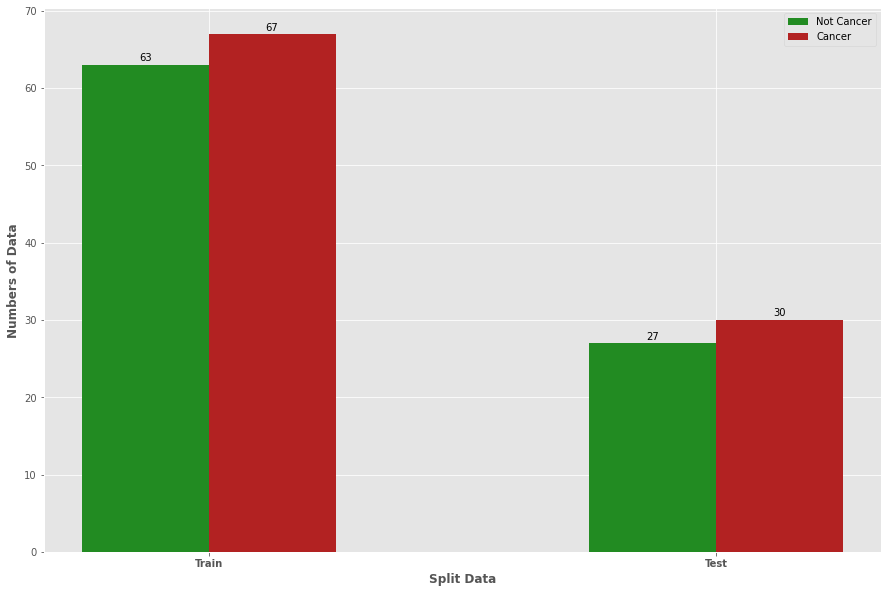

In [ ]:
N = 2
ind = np.arange(N) 
width = 0.25


tidak_kanker = [train.groupby('Label')['Label'].count()[0], test.groupby('Label')['Label'].count()[0]]  
bar1 = plt.bar(ind, tidak_kanker, width, color='forestgreen')
  
kanker = [train.groupby('Label')['Label'].count()[1], test.groupby('Label')['Label'].count()[1]]  
bar2 = plt.bar(ind+width, kanker, width, color='firebrick')

addlabels(tidak_kanker, kanker)
plt.xlabel("Split Data", fontweight="bold")
plt.ylabel("Numbers of Data", fontweight="bold")
  
plt.xticks(ind+width/2,['Train', 'Test'], fontweight="bold")
plt.legend( (bar1, bar2), ('Not Cancer', 'Cancer') )
plt.show()

### PCA

#### Data Train

Membuat PCA dengan 2 komponen

In [ ]:
pca = PCA(n_components=2)
hasil_pca = pca.fit_transform(X_train)
df_pca = pd.DataFrame(hasil_pca, columns = ['principal component 1', 'principal component 2'])
df_pca_train = pd.concat([df_pca, y_train.reset_index(drop=True)], axis = 1)
df_pca_train.head()

,principal component 1,principal component 2,Label
0,-6.444641,5.400026,1
1,-7.490733,1.801547,1
2,7.542768,2.253462,0
3,1.549535,-2.987313,1
4,-10.321389,2.600592,0


Cek apakah sudah sama dengan label

In [ ]:
y_train.reset_index(drop=True).head()

,Label
0,1
1,1
2,0
3,1
4,0


Split kanker dan tidak kanker

In [ ]:
kanker = df_pca_train[df_pca_train['Label'] == 1]
tidak = df_pca_train[df_pca_train['Label'] == 0]

Plot PCA untuk Data Train

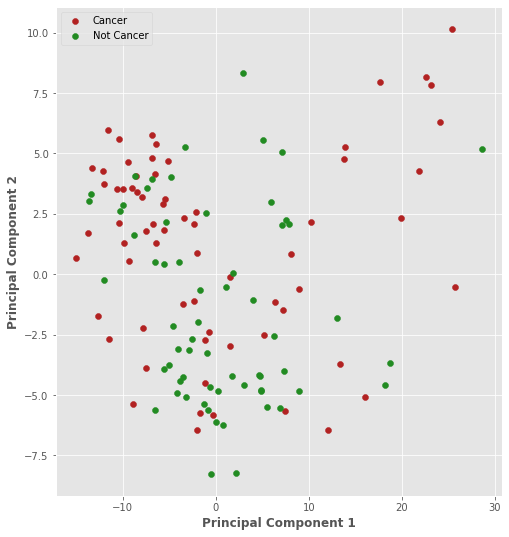

In [ ]:
plt.figure(figsize=(8,9))
plt.scatter(x=kanker['principal component 1'], y=kanker['principal component 2'], color='firebrick')
plt.scatter(x=tidak['principal component 1'], y=tidak['principal component 2'], color='forestgreen')
plt.xlabel('Principal Component 1', fontweight='bold')
plt.ylabel('Principal Component 2', fontweight='bold')
plt.legend(['Cancer', 'Not Cancer'])
plt.show()

#### Data Test

Membuat PCA dengan 2 komponen

In [ ]:
pca = PCA(n_components=2)
hasil_pca = pca.fit_transform(X_test)
df_pca = pd.DataFrame(hasil_pca, columns = ['principal component 1', 'principal component 2'])
df_pca_test = pd.concat([df_pca, y_test.reset_index(drop=True)], axis = 1)
df_pca_test.head()

,principal component 1,principal component 2,Label
0,2.499993,3.033635,0
1,-7.627362,1.561182,1
2,-1.595213,5.676131,1
3,2.598500,-2.780937,0
4,2.452659,-4.559590,1


Cek kesamaan dengan label

In [ ]:
y_test.reset_index(drop=True).head()

,Label
0,0
1,1
2,1
3,0
4,1


Split kanker dan tidak kanker

In [ ]:
kanker = df_pca_test[df_pca_test['Label'] == 1]
tidak = df_pca_test[df_pca_test['Label'] == 0]

Plot PCA Test

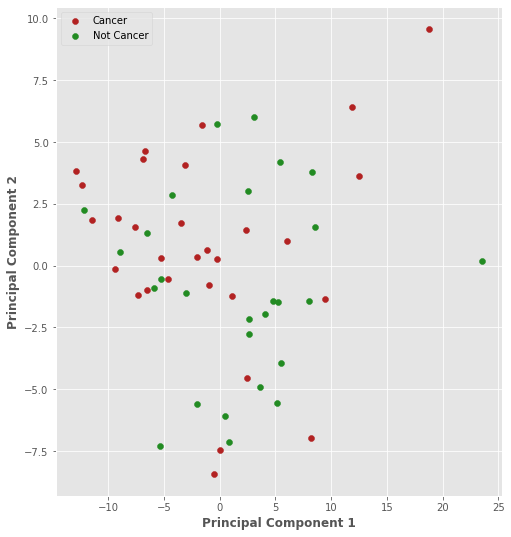

In [ ]:
plt.figure(figsize=(8,9))
plt.scatter(x=kanker['principal component 1'], y=kanker['principal component 2'], color='firebrick')
plt.scatter(x=tidak['principal component 1'], y=tidak['principal component 2'], color='forestgreen')
plt.xlabel('Principal Component 1', fontweight='bold')
plt.ylabel('Principal Component 2', fontweight='bold')
plt.legend(['Cancer', 'Not Cancer'])
plt.show()